##  **Project "Daily count of vaccination by age groups"**

### About this file

This data analysis project focuses on analyzing the dataset titled "Daily count of vaccination by age groups" obtained from data.gov.hk. There is no doubt about how difficult it is to go through the huge COVID-19 pandemic, one of the things that is important in this situation is vaccines. The project aims to provide insights and statistics regarding the vaccination of the different age groups and also the trust of people on each type of vaccine, namely Sinovac and BioNTech. Furthermore, the number of doses and type of vaccine will also be clearly shown, together with the description to show the connection between each year, sex and the age groups. All of these data will be adjusted, grouped, calculated and plotted as a different type of graph for the ease of reading in this project. I hope this project will show the statistical connection between each data and could be used for further research about the vaccination.

### How to use this file

This file contains code and graph for data analysis about the daily count of vaccination by age groups from 2021 to 2023. In order to use and understand this file, description for each step and each graph has been shown. So if you would like to read this project, you can go through from here, down to the bottom of this file. 

### import libraries

**# This program requires "CubicSpline" from "scipy.interpolate"**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

###  import file and adjust column

We are going to import the csv-file, rename columns for ease in doing something with data in the section below and add a "sum" column.

###### This csv-file can be downloaded from https://data.gov.hk/en-data/dataset/hk-hhb-hhbcovid19-vaccination-rates-over-time-by-age/resource/54bcf262-7b77-4e70-a6f3-3f14378e629c

In [2]:
df = pd.read_csv("vaccine_data.csv") # 16910 rows
df['Date'] = pd.to_datetime(df['Date'])

df = df.rename(columns={"Age Group" : "Age"})

df = df.rename(columns={"Sinovac 1st dose" : "S1", "BioNTech 1st dose" : "B1"})
df = df.rename(columns={"Sinovac 2nd dose" : "S2", "BioNTech 2nd dose" : "B2"})
df = df.rename(columns={"Sinovac 3rd dose" : "S3", "BioNTech 3rd dose" : "B3"})

for i in range(4,8) :
    str1_old = "Sinovac "+str(i)+"th dose"
    str1_new = "S"+str(i)
    str2_old = "BioNTech "+str(i)+"th dose"
    str2_new = "B"+str(i)
    df = df.rename(columns={str1_old : str1_new, str2_old : str2_new})

SumS = []
SumB = []
Sum = []
for x in range(0,16911) : 
    sums = 0
    sumb = 0
    for y in range(3,10) : sums += df.iat[x,y]
    for y in range(10,17) : sumb += df.iat[x,y]
    SumS.append(sums)
    SumB.append(sumb)
    Sum.append(sums+sumb)
df["SumS"] = SumS
df["SumB"] = SumB
df["Sum"] = Sum

df

,Date,Age,Sex,S1,S2,S3,S4,S5,S6,S7,B1,B2,B3,B4,B5,B6,B7,SumS,SumB,Sum
0,2021-02-22,30-39,M,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2021-02-22,40-49,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2021-02-22,40-49,M,11,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,11
3,2021-02-22,50-59,F,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2
4,2021-02-22,50-59,M,10,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16906,2023-11-26,60-69,M,0,0,1,2,0,1,0,1,0,0,0,0,1,0,4,2,6
16907,2023-11-26,70-79,F,0,0,0,2,2,2,0,0,0,1,4,1,0,0,6,6,12
16908,2023-11-26,70-79,M,0,0,0,4,2,1,0,0,0,0,0,4,0,0,7,4,11
16909,2023-11-26,80 and above,F,0,1,0,6,0,0,0,0,0,0,9,3,0,0,7,12,19


SumS : sum of Sinovac vaccines<br>
SumB : sum of BioNTech vaccines<br>
Sum  : sum of all vaccines

S followed by the number means the dose of Sinovac vaccine<br>
B followed by the number means the dose of BioNTech vaccine

### The number of vaccination in each month

Now, we are going to find the sum of vaccine in each month (We exclude february 2021 and november 2023 because the data isn't complete)

In [4]:
def create_sum_graph(str1, str2, label1, label2, titlename) :
    data_by_month_x = []
    data_by_month_y_S = []
    data_by_month_y_B = []
    data_by_month_y = []

    for year in range(2021,2024) :
        for month in range(1,13) :
            if year == 2021 and month == 1 : continue
            if year == 2021 and month == 2 : continue
            if year == 2023 and month == 11 : continue
            if year == 2023 and month == 12 : continue

            sumS = 0
            sumB = 0
            dbm = df[(df.Date.dt.year == year) & (df.Date.dt.month == month)]

            for x in range(0,dbm.shape[0]) :
                sumS += dbm[str1].iloc[x]
                sumB += dbm[str2].iloc[x]

            data_by_month_x.append(str(year)+"-"+str(month))
            data_by_month_y.append((sumS+sumB)/1000000)
            data_by_month_y_B.append(sumB/1000000)
            data_by_month_y_S.append(sumS/1000000)

    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(data_by_month_x,data_by_month_y)
    ax.plot(data_by_month_x,data_by_month_y_S)
    ax.plot(data_by_month_x,data_by_month_y_B)

    ax.legend(["Sum", label1, label2])
    plt.ylabel("the number of vaccination in millions")
    plt.xlabel("year and month")
    plt.title(titlename)

    for i, t in enumerate(ax.get_xticklabels()):
        if (i % 4) != 0:
            t.set_visible(False)

    fig.autofmt_xdate()


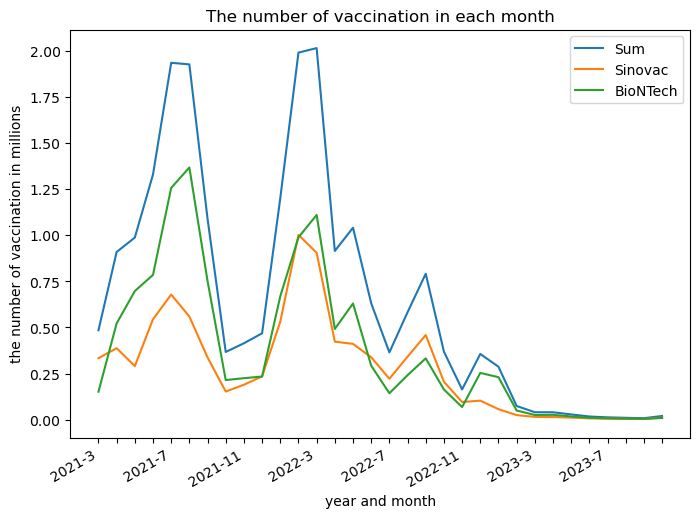

In [5]:
create_sum_graph("SumS", "SumB", "Sinovac", "BioNTech", "The number of vaccination in each month")

This graph represents the number of vaccinations in each month. It's easy to see that most of the people in Hong Kong choose to take BioNTech, instead of Sinovac. Furthermore, there is a high number of vaccinations around August 2021 and March 2022.

But the number of vaccinations doesn't tell how many people trust to take vaccines (i.e. starting to use the new type of vaccine) because some might take more than one dose. So, in order to find this, we will plot a graph again but only for the first dose of vaccination.

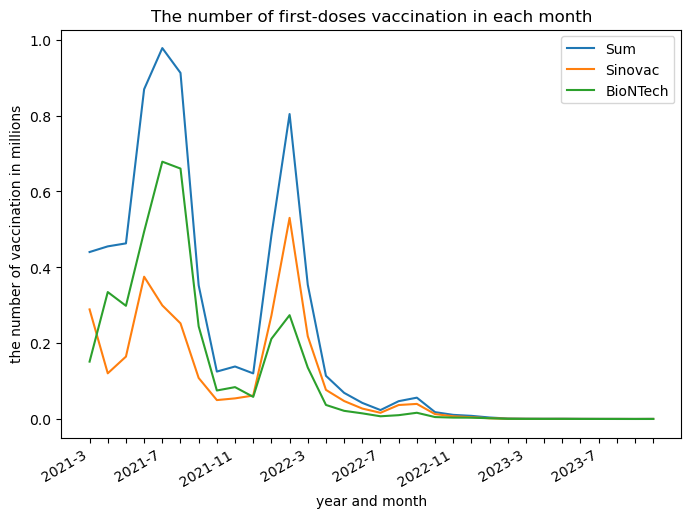

In [6]:
create_sum_graph("S1", "B1", "Sinovac", "BioNTech", "The number of first-doses vaccination in each month")

From the graph, most of the people trust to take BioNTech as the first vaccination, however around February 2022, the number of Sinovac first-dose is much higher than BioNTech first-doses, opposite to July-August 2021.

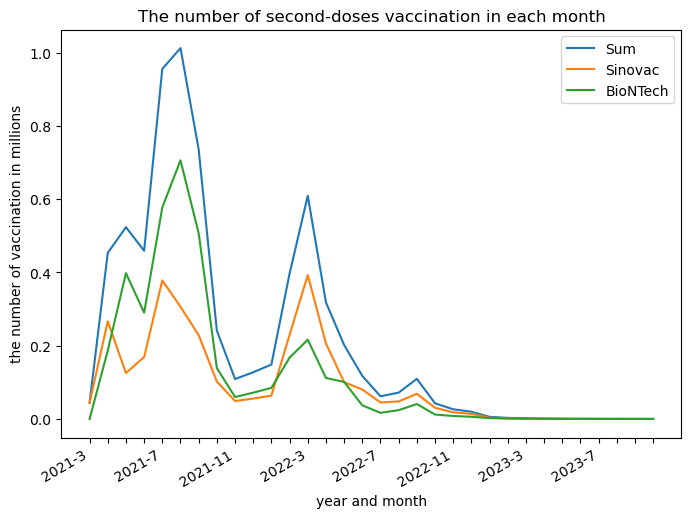

In [7]:
create_sum_graph("S2", "B2", "Sinovac", "BioNTech", "The number of second-doses vaccination in each month")

We see that the 2 charts above have a very similar trend, but the second one the trend will move left a little bit, which means that most of the people tend to have the second doses of vaccine around 1 month after the first one (which is normal for vaccine).

Those 3 previous graphs might be hard to interpret the data, so we are going to use "curve fitting" to make it easy to consider the trend of vaccination. In this curve fitting, we will use the method of "Polynomial Regression". Using the sum of vaccination in each month might not be that good to predict the trend, thus we will use the data of every single day for more precision.

In [8]:
def model_f(x,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14) : # polynomial degree 14 -> pass c[0] to c[14]
    sum = 0
    c = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14]
    for i in range(0,15) :
        sum += (x**i) * c[i]
    return sum

It can't be written as a function which receives a list because it will be broken when sending the list to curve_fit function as a initial guess.

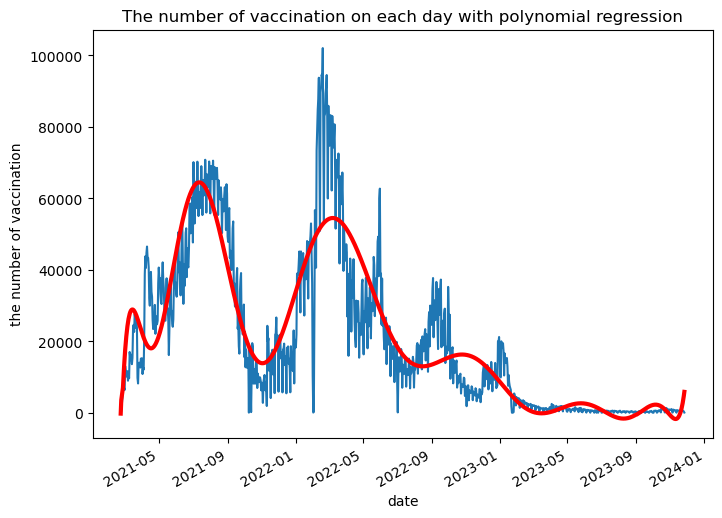

In [9]:
X_label = [] #date to be shown in graph
X_use = [] #the number to be use in the curve fitting
Y_data = [] #the number of vaccine on each day

day = 0
sum = 0
for idx in range(0, df.shape[0]) :
    sum += df["Sum"].iloc[idx]

    if ((idx == df.shape[0]-1) or (df["Date"].iloc[idx] != df["Date"].iloc[idx+1])) :
        Y_data.append(sum)
        X_label.append(df.Date.dt.date.iloc[idx])
        X_use.append(day)
        day+=1
        sum=0

init = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
popt, pcov = curve_fit(model_f, X_use, Y_data, p0 = init)

c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14 = popt
x_model = np.linspace(0, len(Y_data), len(Y_data))
y_model = model_f(x_model,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_label, Y_data)
ax.plot(X_label, y_model, c='r', linewidth=3)
plt.xlabel("date")
plt.ylabel("the number of vaccination")
plt.title("The number of vaccination on each day with polynomial regression")

fig.autofmt_xdate()

Here is the graph showing the trend or the "curve fit" of the number of vaccinations on each day. There are 2 high periods followed by the almost-zero number in 2023. Because of the complication of the graph, the polynomial regression have to use a higher degree to show the trend.

However, because of the fluctuate in the number of vaccination on each day, the polynomial regression might not be the best choice to fit the graph. Instead, we will use the more advanced technique called "Cubic Spline". In this case, we will use the natural cubic spline (assume of the second derivative of the first spline at the first point and the last spline at the last point is 0) instead of clamped cubic spline.

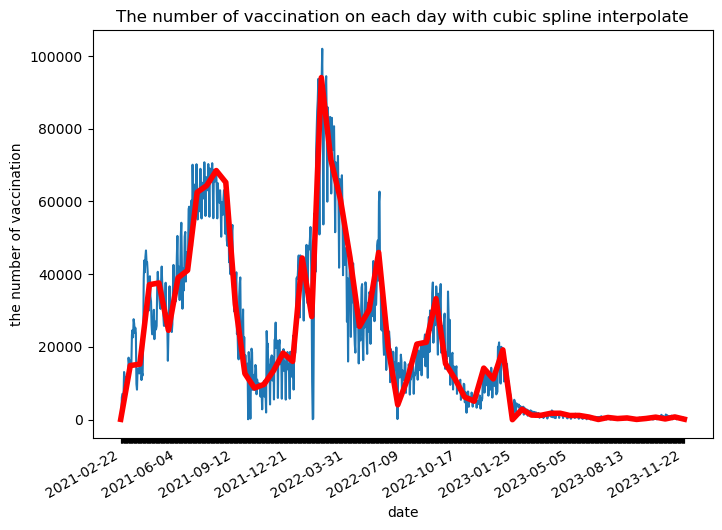

In [10]:
y_cubicN = CubicSpline(X_use, Y_data, bc_type = "natural")
x_interp = np.linspace(0, day-1, 60)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_use, Y_data)
ax.plot(x_interp, y_cubicN(x_interp), c='r', linewidth=4)
plt.ylabel("the number of vaccination")
plt.xlabel("date")
plt.xticks(X_use, X_label)
plt.title("The number of vaccination on each day with cubic spline interpolate")

for i, t in enumerate(ax.get_xticklabels()):
        if (i % 100) != 0:
            t.set_visible(False)

fig.autofmt_xdate()

By using "Cubic Spline Interpolation", the curve fit will be more effective. We can see the peak and the fluctuate of the graph easier, which can use to predict the missing data on some days.

Next, we will find the average vaccination for one month of each year.

In [11]:
def find_sum(l, r, Year) :
    sumS = 0
    sumB = 0
    for Month in range(l,r) :
        dbm = df[(df.Date.dt.year == Year) & (df.Date.dt.month == Month)]
        for x in range(0,dbm.shape[0]) :
            sumS += dbm["SumS"].iloc[x]
            sumB += dbm["SumB"].iloc[x]
    return [round((sumS+sumB)/10),round(sumS/10),round(sumB/10)]

In [12]:
data_total_year_x = ['2021','2022','2023']
data_total_year_y = []

data_total_year_y.append(find_sum(3,13,2021))
data_total_year_y.append(find_sum(1,13,2022))
data_total_year_y.append(find_sum(1,11,2023))

X = ["2021","2022","2023"]
Col = ["The average number of vacciation", "Sinovac", "BioNTech"]

df_number_by_year = pd.DataFrame(data_total_year_y, columns =  Col, index = data_total_year_x)
df_number_by_year

,The average number of vacciation,Sinovac,BioNTech
2021,990497,370419,620078
2022,1041309,503314,537996
2023,53598,15242,38356


We will see that BioNTech is much higher than Sinovac, however both are slightly the same in 2022.

### The number of vaccination in different age group

Now, we are going to the next part to consider about the age-group and sex.

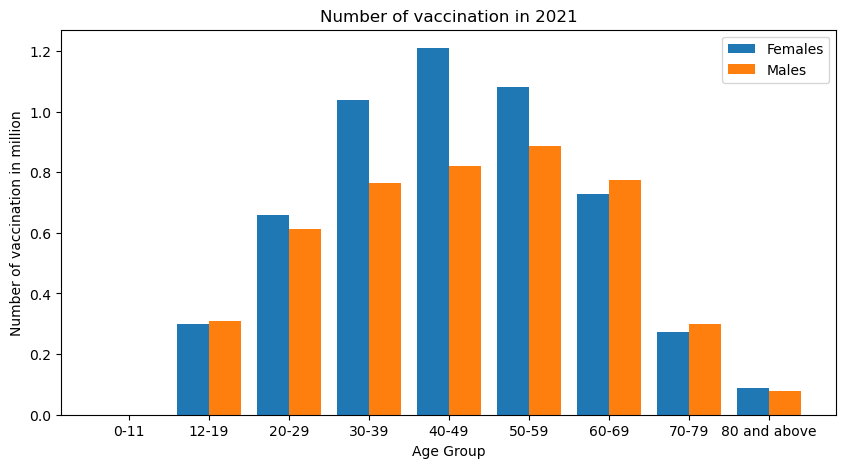

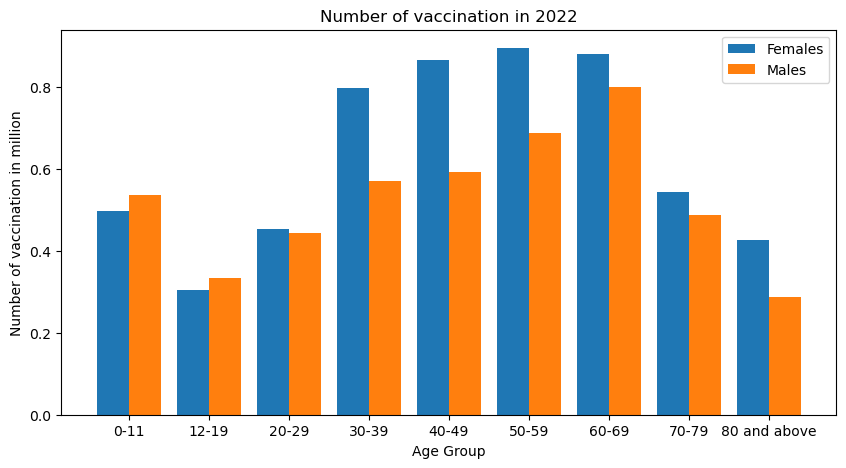

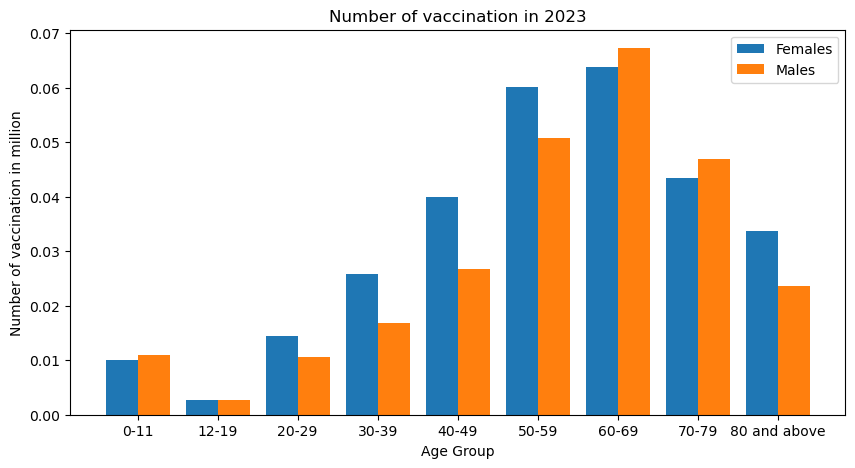

In [13]:
X = ["0-11","12-19","20-29","30-39","40-49","50-59","60-69","70-79","80 and above"] # 9

for year in range(2021,2024) :
    sumM = []
    sumF = []

    dby_male = df[(df.Date.dt.year == year) & (df.Sex == "M")]
    for i in range(0,9) :
        dby_male_age = dby_male[dby_male.Age == X[i]]
        sum = 0
        for idx in range(0,dby_male_age.shape[0]) :
            sum += dby_male_age["Sum"].iloc[idx]
        sumM.append(sum/1000000)


    dby_female = df[(df.Date.dt.year == year) & (df.Sex == "F")]
    for i in range(0,9) :
        dby_female_age = dby_female[dby_female.Age == X[i]]
        sum = 0
        for idx in range(0,dby_female_age.shape[0]) :
            sum += dby_female_age["Sum"].iloc[idx]
        sumF.append(sum/1000000)
    
    X_axis = np.arange(len(X)) 
  
    plt.figure(figsize=(10,5))
    plt.bar(X_axis - 0.2, sumF, 0.4, label = 'Females') 
    plt.bar(X_axis + 0.2, sumM, 0.4, label = 'Males') 
    
    plt.xticks(X_axis, X) 
    plt.xlabel("Age Group") 
    plt.ylabel("Number of vaccination in million") 
    plt.title("Number of vaccination in " + str(year)) 
    plt.legend()
    plt.show() 

    

The bar charts show the data about males and females of different age groups, taking vaccines in each year. From the graph, most of the age group, females tend to take vaccines more than males. The most significant change is that in 2021 and 2022, the middle-people are those who tend to be vaccinated, however, it changes to old-people in 2023. Moreover, in 2021, children are prohibited to take vaccines.

### The trend to have the next dose of vaccination

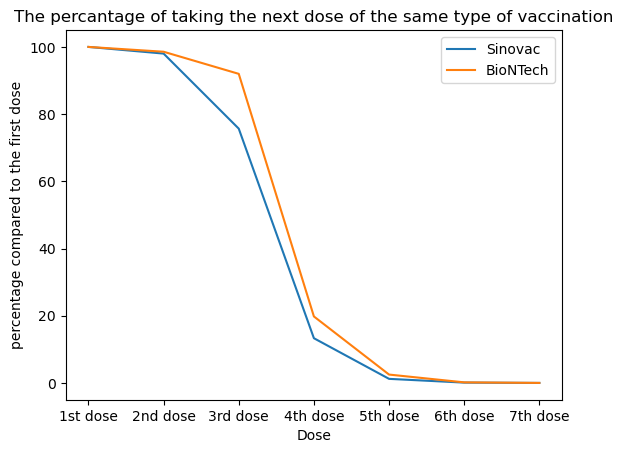

In [14]:
X = ["1st dose", "2nd dose", "3rd dose", "4th dose", "5th dose", "6th dose", "7th dose"]
S_dose_cnt = [0,0,0,0,0,0,0]
B_dose_cnt = [0,0,0,0,0,0,0]

for idx in range(0,df.shape[0]) :
    for i in range(3,10) :
        S_dose_cnt[i-3] += df.iat[idx,i]
    for i in range(10,17) :
        B_dose_cnt[i-10] += df.iat[idx,i]

firS = S_dose_cnt[0]
firB = B_dose_cnt[0]
for i in range(0,7) :
    S_dose_cnt[i] = (S_dose_cnt[i] / firS) * 100
    B_dose_cnt[i] = (B_dose_cnt[i] / firB) * 100

plt.plot(X,S_dose_cnt)
plt.plot(X,B_dose_cnt)
plt.legend(["Sinovac", "BioNTech"])
plt.title("The percantage of taking the next dose of the same type of vaccination")
plt.ylabel("percentage compared to the first dose")
plt.xlabel("Dose")
plt.show()

This graph presents the data about the percentage of taking the next dose of vaccine, giving 100% for the first dose. It is clear that most people are going to take 2-3 doses of vaccine as the graph decreases sharply in the 4th, 5th dose and becomes near 0 percent for the 6th and 7th dose, compared to the number of first doses.

Next, because there is a significant drop in the number of 4 to 7 doses, we are going to find which age groups tend to take at least 4 doses of vaccine. Since we want the number of people, we will count only the number of 4th dose. (Everyone who takes 5-7 doses must also take the 4th doses)

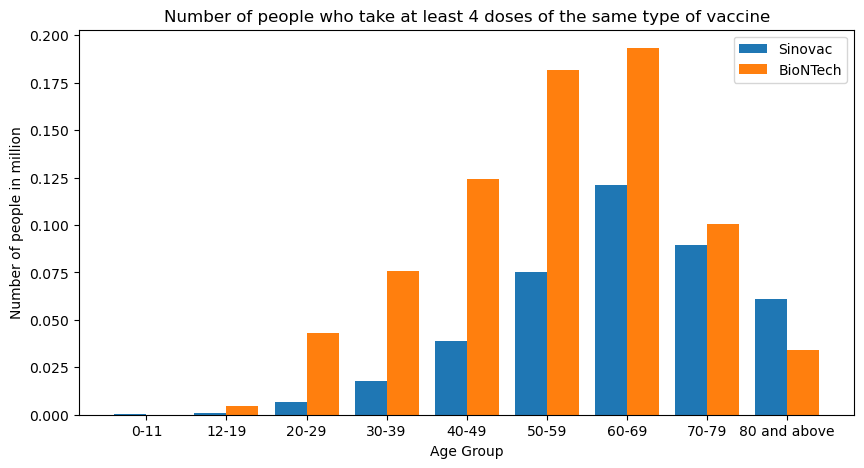

In [15]:
X = ["0-11","12-19","20-29","30-39","40-49","50-59","60-69","70-79","80 and above"]
sumS = []
sumB = []

for i in range(0,9) :
    df_by_age = df[df.Age == X[i]]
    sums = 0
    sumb = 0
    for idx in range(0,df_by_age.shape[0]) :
        sums += df_by_age.iat[idx,6]
        sumb += df_by_age.iat[idx,13]
    sumS.append(sums/1000000)
    sumB.append(sumb/1000000)

X_axis = np.arange(len(X))   

plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, sumS, 0.4, label = 'Sinovac') 
plt.bar(X_axis + 0.2, sumB, 0.4, label = 'BioNTech') 

plt.xticks(X_axis, X) 
plt.xlabel("Age Group") 
plt.ylabel("Number of people in million") 
plt.title("Number of people who take at least 4 doses of the same type of vaccine") 
plt.legend()
plt.show() 

        

From the bar chart above, it is clear that most of the people who take at least 4 doses of the same type of vaccine are those whose age is between 50 to 69, which they mostly choose BioNTech.

### Conclusion

In conclusion, it is clear that most people choose to take vaccines from bioNTech and there are 2 periods with a high number of vaccinations which are around August 2021 and March 2022. However, the number of vaccinations keep falling after February 2023. Furthermore, females tend to be vaccinated more than males and the age group that has the highest number of vaccination is 40 to 49, although people in the older group are likely to have more vaccination in 2023. In addition, most people have at most 3 doses of the same vaccine. There are only a few people who take at least 4 doses of the same vaccine, most of them are between 60 and 69 years old and they choose BioNTech instead of Sinovac.

### Reflection

This project is to analyze a dataset about "Daily count of vaccination by age groups" from data.gov.hk by using different methods to make the data easy to read and interpret. Analyzing data requires a lot of processes, we have to adjust the data for it to be in the form that is easy to calculate. Some mathematical methods could be used here too ex. average, sum and polynomial for polynomial regression. Grouping the data and choosing some important connection to represent the trend of the data is the thing to do next. After that, one of the most crucial steps is to choose the correct type of presentation or graph together with the correct label in order to conclude all the data that we have done.

### References

ArijitGayen. 2022. SciPy | Curve Fitting. 8 6. Accessed 11 29, 2023. https://www.geeksforgeeks.org/scipy-curve-fitting/.

2023. Daily count of vaccination by age groups. 11 21. Accessed 11 27, 2023. https://data.gov.hk/en-data/dataset/hk-hhb-hhbcovid19-vaccination-rates-over-time-by-age.

John Hunter, Darren Dale, Eric Firing, Michael Droettboom. n.d. Pyplot tutorial. Accessed 11 28, 2023. https://matplotlib.org/stable/tutorials/pyplot.html.